**SVM SUPPORT VECTOR MACHINES**
(LINEAR, POLY Y RBF)

In [1]:
!pip install mglearn

     |████████████████████████████████| 542kB 3.3MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=3d5b371e7915795ce11859c670b45e0af598804470231d21ead6373ba414a6c3
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [10]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import pandas as pd #procesamiento de archivos 
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix  #matrix de confusion
from sklearn import preprocessing
from keras import optimizers
from sklearn.metrics import classification_report
from sklearn.preprocessing import minmax_scale

In [11]:
def clasificadorSVM(kernel, X,y):
    cls=SVC(kernel=kernel,gamma=10)
    cls.fit(X,y)
    cls.score(X,y)
    return cls

def resultadosSVM(cls, X, y):
    score = cls.score(X, y)
    return score

def predecirSVM(cls, X, y):
    yPred = cls.predict(X)
    matrixConf = confusion_matrix(y, yPred)
    report = classification_report(y, yPred)
    return matrixConf, report

In [17]:
df = pd.read_csv('/content/data.csv')  # Dataset - Breast Cancer Wisconsin Data
df['diagnosis'] = df['diagnosis'].map({
    'M': 0,
    'B': 1
})  # Label values - 1 for Malignant and 2 for Benign
labels = df['diagnosis'].tolist()
df['Class'] = labels  #Cpying values of diagnosis to newly clreated labels column
df = df.drop(['id', 'Unnamed: 32', 'diagnosis'],
             axis=1)  #Dropping unncessary columns
df.head()  #Displaying first five rows of the dataset

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [18]:
target_names = ['M', 'B']
df['attack_type'] = df.Class.apply(lambda x: target_names[x])
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Class,attack_type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,M


In [19]:
df1 = df[df.Class == 0]
df2 = df[df.Class == 1]

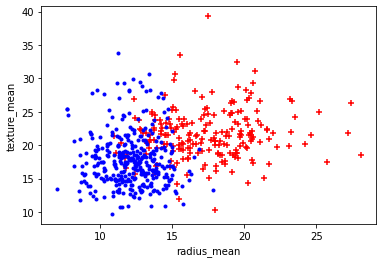

In [20]:
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.scatter(df1['radius_mean'], df1['texture_mean'], color='red', marker='+')
plt.scatter(df2['radius_mean'], df2['texture_mean'], color='blue', marker='.')

In [56]:
X = df.drop(['Class', 'attack_type'], axis='columns')
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [57]:
y = df.Class
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: Class, Length: 569, dtype: int64


In [58]:
from sklearn.preprocessing import MinMaxScaler
msc = MinMaxScaler()
X = msc.fit_transform(X)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [60]:
print('X train:',len(X_train))
print('X test:',len(X_test))

X train: 398
X test: 171


In [61]:
cls_linear=clasificadorSVM("linear",X,y)

In [49]:
cls_poly=clasificadorSVM("poly",X,y)

In [38]:
cls_rbf=clasificadorSVM("rbf",X,y)

In [62]:
##Rendimiento
#LINEAR
score_Train=resultadosSVM(cls_linear,X_train,y_train)
print('Score Train:',round(score_Train,4))
score_Test=resultadosSVM(cls_linear,X_test,y_test)
print('Score Test',round(score_Test,4))

Score Train: 0.9799
Score Test 0.9883


In [50]:
#POLY
score_Train2=resultadosSVM(cls_poly,X_train,y_train)
print('Score Train:',round(score_Train2,4))
score_Test2=resultadosSVM(cls_poly,X_test,y_test)
print('Score Test',round(score_Test2,4))

Score Train: 1.0
Score Test 1.0


In [39]:
#RBF
score_Train3=resultadosSVM(cls_rbf,X_train,y_train)
print('Score Train:',round(score_Train3,4))
score_Test3=resultadosSVM(cls_rbf,X_test,y_test)
print('Score Test',round(score_Test3,4))

Score Train: 0.9899
Score Test 0.9942


In [63]:
##Confussion Mat
#LINEAR
matrix_conf, report = predecirSVM(cls_linear,X_train,y_train)
print(matrix_conf)
print(report)
matrix_conf, report = predecirSVM(cls_linear,X_test,y_test)
print(matrix_conf)
print(report)

[[143   7]
 [  1 247]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       150
           1       0.97      1.00      0.98       248

    accuracy                           0.98       398
   macro avg       0.98      0.97      0.98       398
weighted avg       0.98      0.98      0.98       398

[[ 60   2]
 [  0 109]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        62
           1       0.98      1.00      0.99       109

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



In [51]:
#POLY
matrix_conf2, report2 = predecirSVM(cls_poly,X_train,y_train)
print(matrix_conf2)
print(report2)
matrix_conf2, report2 = predecirSVM(cls_poly,X_test,y_test)
print(matrix_conf2)
print(report2)

[[153   0]
 [  0 245]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       245

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

[[ 59   0]
 [  0 112]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00       112

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



In [40]:
#RBF
matrix_conf3, report3 = predecirSVM(cls_rbf,X_train,y_train)
print(matrix_conf3)
print(report3)
matrix_conf3, report3 = predecirSVM(cls_rbf,X_test,y_test)
print(matrix_conf3)
print(report3)

[[143   4]
 [  0 251]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       147
           1       0.98      1.00      0.99       251

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398

[[ 64   1]
 [  0 106]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        65
           1       0.99      1.00      1.00       106

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [64]:
#cls=csvm("linear",x,y);
#cls=csvm("linear",x,y);
#cls=csvm("rbf",x,y);
#cls=csvm("poly",x,y);
#cls=csvm("rbf",x,y);
#cls=csvm("sigmoid",x,y);
#PREDICCIONES

#LINEAR
valPredict_train=cls_linear.predict(X_train).round()
confusion_matrix_train=confusion_matrix(y_train,valPredict_train)
valPredict_test=cls_linear.predict(X_test).round()
confusion_matrix_test=confusion_matrix(y_test,valPredict_test)

In [53]:
#POLY
valPredict_train2=cls_poly.predict(X_train).round()
confusion_matrix_train2=confusion_matrix(y_train,valPredict_train2)
valPredict_test2=cls_poly.predict(X_test).round()
confusion_matrix_test2=confusion_matrix(y_test,valPredict_test2)

In [41]:
#RBF
valPredict_train3=cls_rbf.predict(X_train).round()
confusion_matrix_train3=confusion_matrix(y_train,valPredict_train3)
valPredict_test3=cls_rbf.predict(X_test).round()
confusion_matrix_test3=confusion_matrix(y_test,valPredict_test3)

In [16]:
#mMATRICES DE CONFUSION
#LINEAR
print("===============confusion_matrix_train===============")
print(confusion_matrix_train)
print("==============confusion_matrix_test================")
print(confusion_matrix_test)

===============confusion_matrix_train===============
[[141   7]
 [  7 243]]
==============confusion_matrix_test================
[[ 60   4]
 [  1 106]]


In [54]:
#POLY
print("===============confusion_matrix_train===============")
print(confusion_matrix_train2)
print("==============confusion_matrix_test================")
print(confusion_matrix_test2)

===============confusion_matrix_train===============
[[153   0]
 [  0 245]]
==============confusion_matrix_test================
[[ 59   0]
 [  0 112]]


In [42]:
#RBF
print("===============confusion_matrix_train===============")
print(confusion_matrix_train3)
print("==============confusion_matrix_test================")
print(confusion_matrix_test3)

===============confusion_matrix_train===============
[[143   4]
 [  0 251]]
==============confusion_matrix_test================
[[ 64   1]
 [  0 106]]


In [65]:
#CONCLUSIONES
#LINEAL
print("CONCLUSIONES:")
print("Los resultados de la evaluacion del modelo LINEAL son:")
print("-Entrenamiento: ",round(score_Train,4))
print("-Testeo: ",round(score_Test,4))

CONCLUSIONES:
Los resultados de la evaluacion del modelo LINEAL son:
-Entrenamiento:  0.9799
-Testeo:  0.9883


In [55]:
#POLY
print("Los resultados de la evaluacion del modelo POLY son:")
print("-Entrenamiento: ",round(score_Train2,4))
print("-Testeo: ",round(score_Test2,4))

Los resultados de la evaluacion del modelo POLY son:
-Entrenamiento:  1.0
-Testeo:  1.0


In [43]:
#RBF
print("Los resultados de la evaluacion del modelo RBF son:")
print("-Entrenamiento: ",round(score_Train3,4))
print("-Testeo: ",round(score_Test3,4))

Los resultados de la evaluacion del modelo RBF son:
-Entrenamiento:  0.9899
-Testeo:  0.9942


En base a los resultados se concluye que el kernel 'POLY' es el que mejor resultados arrojó a la hora de entrenar y testear los datos correspondientes al data set: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data 